In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_csv('Advertising.csv')

In [11]:
df.head(10)

,TV,radio,newspaper,Total spent,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
5,8.7,48.9,75.0,132.6,7.2
6,57.5,32.8,23.5,113.8,11.8
7,120.2,19.6,11.6,151.4,13.2
8,8.6,2.1,1.0,11.7,4.8
9,199.8,2.6,21.2,223.6,10.6


# 1. Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$

In [12]:
# J is cost; function of w, b
# w is bolded because it's a vector
# b is intercept
# i is superscript, not power (Represents a row)
# x is number of features (it's bolded because there can be multiple x values)
# Bottom equation is the equation for Prediction

# 2. Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [13]:
# Gradient Descent is given the learning rate
# Learning rate is a hyper parameter we use; look for the one with the highest performance rate
# alpha is learning rate
# Subscript j represents the selected feature
# b belongs to entire row

## 2.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (4) and (5) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

In [14]:
df.describe()

,TV,radio,newspaper,Total spent,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,200.860500,14.022500
std,85.854236,14.846809,21.778621,92.985181,5.217457
min,0.700000,0.000000,0.300000,11.700000,1.600000
25%,74.375000,9.975000,12.750000,123.550000,10.375000
50%,149.750000,22.900000,25.750000,207.350000,12.900000
75%,218.825000,36.525000,45.100000,281.125000,17.400000
max,296.400000,49.600000,114.000000,433.600000,27.000000


<Axes: xlabel='Total spent', ylabel='sales'>

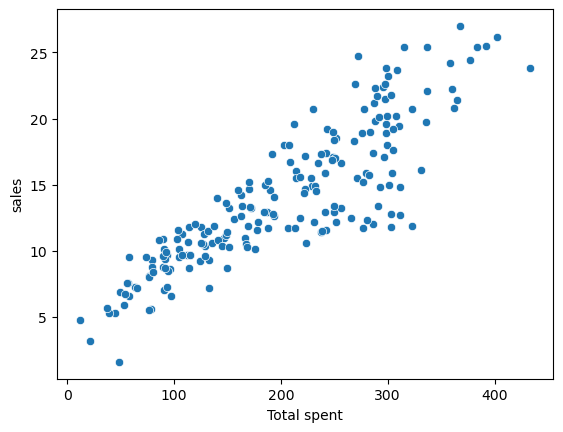

In [16]:
sns.scatterplot(x='Total spent', y='sales', data=df)

In [17]:
class LinearRegression:
    def __init__(self, alpha=0.001, n_iter=1000):
        self.alpha = alpha
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights = self.weights - self.alpha * dw
            self.bias = self.bias - self.alpha * db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred

In [2]:
df = pd.read_csv('MedianHomePrices.csv')

In [3]:
df.head()

,Year,Interest Rate(%),Median home price
0,1988,10.3,183800
1,1989,10.3,183200
2,1990,10.1,174900
3,1991,9.3,173500
4,1992,8.4,172900


In [4]:
df.describe()

,Year,Interest Rate(%),Median home price
count,16.000000,16.000000,16.000000
mean,1995.500000,8.056250,204756.250000
std,4.760952,1.352513,51054.114673
min,1988.000000,5.800000,169700.000000
25%,1991.750000,7.225000,173425.000000
50%,1995.500000,7.750000,180550.000000
75%,1999.250000,8.625000,209950.000000
max,2003.000000,10.300000,329800.000000


In [5]:
X = df['Interest Rate(%)']
X

0     10.3
1     10.3
2     10.1
3      9.3
4      8.4
5      7.3
6      8.4
7      7.9
8      7.6
9      7.6
10     6.9
11     7.4
12     8.1
13     7.0
14     6.5
15     5.8
Name: Interest Rate(%), dtype: float64

In [1]:
X = df['Interest Rate(%)'].apply(lambda x:[x]).tolist()
#X

NameError: name 'df' is not defined

In [8]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [9]:
X = np.array(X)
X.shape

(16, 1)

In [10]:
y = df['Median home price']
y

0     183800
1     183200
2     174900
3     173500
4     172900
5     173200
6     173200
7     169700
8     174500
9     177900
10    188100
11    203200
12    230200
13    258200
14    309800
15    329800
Name: Median home price, dtype: int64

In [11]:
# y = -23409x + 393349
b = 393349
w = np.array([-23409])
print(f'w shape: {w.shape}, b type: {type(b)}')

w shape: (1,), b type: <class 'int'>


In [19]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    cost = 0.0
    for i in range(m): # 0 to m-1
        f_wb_i = np.dot(w, X[i]) + b # prediction
        Residual = f_wb_i - y[i]
        # add precision(2 decimal)
        print(f'Prediction: {f_wb_i}, Residual: {Residual}, Residual^2: {(Residual)**2}')
        cost = cost + (Residual)**2
        
    cost = cost/(2*m)
    return cost

In [20]:
cost = compute_cost(X, y, w, b)
print(f'Cost: {cost}')

Prediction: 152236.3, Residual: -31563.70000000001, Residual^2: 996267157.6900008
Prediction: 152236.3, Residual: -30963.70000000001, Residual^2: 958750717.6900008
Prediction: 156918.1, Residual: -17981.899999999994, Residual^2: 323348727.6099998
Prediction: 175645.3, Residual: 2145.2999999999884, Residual^2: 4602312.0899999505
Prediction: 196713.4, Residual: 23813.399999999994, Residual^2: 567078019.5599997
Prediction: 222463.30000000002, Residual: 49263.30000000002, Residual^2: 2426872726.890002
Prediction: 196713.4, Residual: 23513.399999999994, Residual^2: 552879979.5599997
Prediction: 208417.9, Residual: 38717.899999999994, Residual^2: 1499075780.4099996
Prediction: 215440.6, Residual: 40940.600000000006, Residual^2: 1676132728.3600004
Prediction: 215440.6, Residual: 37540.600000000006, Residual^2: 1409296648.3600004
Prediction: 231826.9, Residual: 43726.899999999994, Residual^2: 1912041783.6099994
Prediction: 220122.4, Residual: 16922.399999999994, Residual^2: 286367621.7599998
P